# Forecasting with DMD

In [1]:
from dmdTrading.core import DMD
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Import Data

In [2]:
df = pd.read_csv('./../datasets/all_prices.csv', header=None)
df.shape

(2210, 8760)

In [3]:
df.columns = [f't_{i}' for i in range(len(df.columns))]
df.index = [f'node_{i}' for i in range(len(df.index))]
df.head()

,t_0,t_1,t_2,t_3,t_4,t_5,t_6,t_7,t_8,t_9,...,t_8750,t_8751,t_8752,t_8753,t_8754,t_8755,t_8756,t_8757,t_8758,t_8759
node_0,37.4536,35.2093,33.7736,32.2931,34.0628,37.1774,39.1263,39.7813,35.8992,30.8112,...,22.4029,27.4676,34.3101,44.0656,43.4275,40.7375,38.7477,34.2279,33.4598,30.3272
node_1,35.3287,33.3665,31.9669,30.6517,32.2943,35.2636,37.0178,37.3970,33.7963,28.9887,...,21.2535,25.9039,30.8429,33.4944,33.0254,31.3358,34.3047,29.0287,31.6259,28.8040
node_2,35.3542,33.3802,31.9867,30.6611,32.3208,35.2781,37.0292,37.4395,33.8521,29.0397,...,21.2602,25.9093,30.9122,33.6480,33.1765,31.4729,34.4325,29.1282,31.7123,28.8642
node_3,35.7478,33.6656,32.3059,30.8911,32.6526,35.5572,37.3108,37.9873,34.4484,29.6132,...,21.8249,26.4859,32.5726,40.8667,40.0649,37.6359,36.6090,31.8292,31.5926,28.8642
node_4,35.3105,33.3424,31.9505,30.6264,32.2810,35.2383,36.9873,37.3854,33.7963,28.9947,...,21.2267,25.8794,30.4144,30.6428,30.2418,28.7951,33.6578,27.9885,31.8053,28.9244


## Prepare Dataset and Time Vectors

In [4]:
num_train = 2*24
num_predict = 2*24
nodes = 100
t_in = np.arange(num_train)
t_out = np.arange(num_predict) + num_train
X_train = df.values[0:nodes, 0:num_train]
X_test = df.values[0:nodes, num_train:num_train + num_predict]

## Decompose

In [5]:
model = DMD.decomp(Xf = X_train, time = t_in, verbose=True,
                   svd_cut=True, num_svd=40)

Entering Dynamic Mode Decomposition:

X = 
 [[37.4536 35.2093 33.7736 ... 46.0115 43.7957 46.9087]
 [35.3287 33.3665 31.9669 ... 39.6079 39.5714 44.3846]
 [35.3542 33.3802 31.9867 ... 39.585  39.554  44.4031]
 ...
 [35.5182 33.4765 32.1282 ... 39.4934 39.4669 44.5277]
 [35.325  33.3596 31.9637 ... 39.585  39.554  44.38  ]
 [37.1256 34.8895 33.4643 ... 46.7808 44.3138 47.0286]] 

X` = 
 [[35.2093 33.7736 32.2931 ... 43.7957 46.9087 37.7929]
 [33.3665 31.9669 30.6517 ... 39.5714 44.3846 35.5637]
 [33.3802 31.9867 30.6611 ... 39.554  44.4031 35.5711]
 ...
 [33.4765 32.1282 30.7588 ... 39.4669 44.5277 35.6411]
 [33.3596 31.9637 30.6422 ... 39.554  44.38   35.5564]
 [34.8895 33.4643 31.9213 ... 44.3138 47.0286 37.5055]] 

Singular value decomposition:
U: 
 [[-0.10424514 -0.11956188 -0.13349236 ... -0.00564259 -0.01529369
   0.01134937]
 [-0.09747651  0.07979498  0.00756246 ...  0.0280119  -0.13970623
   0.00287997]
 [-0.09754276  0.08121206  0.00518863 ...  0.0823755   0.0013681
   0.052549

## Predict

In [6]:
y_test = []
for t in t_out:
    y_test.append(DMD.predict(model, t))
y_test = np.array(y_test).T

## Visualize

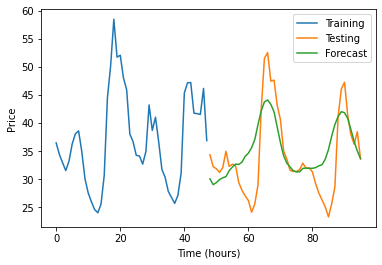

In [7]:
node_vis_id = 7
fig, ax = plt.subplots()
ax.plot(t_in, X_train[node_vis_id], label='Training')
ax.plot(t_out, X_test[node_vis_id], label='Testing')
ax.plot(t_out, y_test[node_vis_id], label='Forecast')
ax.legend()
ax.set_xlabel('Time (hours)')
ax.set_ylabel('Price')
plt.show()